In [42]:
import pandas as pd

# Load the CSV file
file_path = 'Rounded_Corrected_Electricity_Consumption_and_Cost_Analysis.csv'
energy_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
## show the amout of NaN
print(energy_data.isnull().sum())
energy_data


Unnamed: 0             0
Consumption_kWh        0
Daily_Average_Price    0
Daily_Cost             0
dtype: int64


,Unnamed: 0,Consumption_kWh,Daily_Average_Price,Daily_Cost
0,2024-01-01,6439.00,441.01,2839.66
1,2024-01-02,13376.50,1382.36,18491.14
2,2024-01-03,13500.50,1261.11,17025.62
3,2024-01-04,13942.50,2051.95,28609.31
4,2024-01-05,13946.25,2314.17,32273.99
...,...,...,...,...
901,2024-06-18,59.50,2524.93,150.23
902,2024-06-18,59.50,2524.93,150.23
903,2024-06-18,59.50,2524.93,150.23
904,2024-06-18,59.50,2524.93,150.23


In [46]:
# Data Cleaning
# Convert 'category' to datetime
energy_data["Unnamed: 0"] = pd.to_datetime(energy_data['category'], format='%Y-%m-%d")

# Rename columns for easier handling
energy_data.rename(columns={'category': 'Date', 'Denní průměr': 'Daily_Average_Price', 'Hodinová cena': 'Hourly_Price'}, inplace=True)

# Check for missing values and basic statistics
missing_values = energy_data.isna().sum()
basic_statistics = energy_data.describe()

missing_values, basic_statistics


(Unnamed: 0             0
 Consumption_kWh        0
 Daily_Average_Price    0
 Daily_Cost             0
 dtype: int64,
                           Unnamed: 0  Consumption_kWh  Daily_Average_Price  \
 count                            906       906.000000           906.000000   
 mean   2024-05-20 13:16:17.483443968     10576.477097          2380.578311   
 min              2024-01-01 00:00:00        59.500000           154.000000   
 25%              2024-05-21 00:00:00      6082.437500          2524.930000   
 50%              2024-05-31 00:00:00     12450.000000          2524.930000   
 75%              2024-06-09 00:00:00     13101.250000          2524.930000   
 max              2024-06-18 00:00:00     16829.000000          2888.140000   
 std                              NaN      3721.516005           383.779492   
 
          Daily_Cost  
 count    906.000000  
 mean   25264.354967  
 min      144.090000  
 25%    15235.420000  
 50%    30775.090000  
 75%    32553.900000  
 max   

In [48]:
import matplotlib.pyplot as plt

# Handling missing values by filling with the mean of the respective column
energy_data['Daily_Average_Price'].fillna(energy_data['Daily_Average_Price'].mean(), inplace=True)
#nergy_data['Hourly_Price'].fillna(energy_data['Hourly_Price'].mean(), inplace=True)

# Visualize the Daily Average Price over time
plt.figure(figsize=(14, 7))
plt.plot(energy_data['Date'], energy_data['Daily_Average_Price'], label='Daily Average Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Average Price of Electricity Over Time')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\kzem\AppData\Local\Temp\ipykernel_26272\1879772857.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





KeyError: 'Date'

<Figure size 1400x700 with 0 Axes>

In [51]:
## More information about the data
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the date column as the index for time series analysis
energy_data.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(energy_data['Daily_Average_Price'], model='additive', period=365)

# Plot the decomposition results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
ax1.set_title('Observed')

decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
ax2.set_title('Trend')

decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
ax3.set_title('Seasonal')

decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
ax4.set_title('Residual')
ax4.set_xlabel('Date')

plt.tight_layout()
plt.show()


KeyError: "None of ['Date'] are in the columns"

In [5]:
# Load the electricity consumption data from the provided Excel file
consumption_file_path = 'Gamma_export-elektrina (3).xlsx'
consumption_data = pd.read_excel(consumption_file_path)

# Display the first few rows of the consumption data to understand its structure
consumption_data


,Sumární součet,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,Počátek intervalu,Konec intervalu,Činná - spotřeba[kW]
4,1.1.2024 00:00:00,1.1.2024 00:15:00,242
...,...,...,...
16315,18.6.2024 22:45:00,18.6.2024 23:00:00,0
16316,18.6.2024 23:00:00,18.6.2024 23:15:00,0
16317,18.6.2024 23:15:00,18.6.2024 23:30:00,0
16318,18.6.2024 23:30:00,18.6.2024 23:45:00,0


In [50]:
# Re-importing the file due to the previous connection error
consumption_data = pd.read_excel(consumption_file_path, skiprows=4)

# Display the first few rows again to check for discrepancies
consumption_data.head(10)


,Počátek intervalu,Konec intervalu,Činná - spotřeba[kW]
0,1.1.2024 00:00:00,1.1.2024 00:15:00,242
1,1.1.2024 00:15:00,1.1.2024 00:30:00,254
2,1.1.2024 00:30:00,1.1.2024 00:45:00,252
3,1.1.2024 00:45:00,1.1.2024 01:00:00,251
4,1.1.2024 01:00:00,1.1.2024 01:15:00,243
5,1.1.2024 01:15:00,1.1.2024 01:30:00,242
6,1.1.2024 01:30:00,1.1.2024 01:45:00,251
7,1.1.2024 01:45:00,1.1.2024 02:00:00,255
8,1.1.2024 02:00:00,1.1.2024 02:15:00,243
9,1.1.2024 02:15:00,1.1.2024 02:30:00,244


In [49]:
# Re-import and clean the data with the correct date format

# Re-import the consumption data
consumption_data = pd.read_excel(consumption_file_path, skiprows=4)

# Rename columns for easier handling
consumption_data.columns = ['Interval_Start', 'Interval_End', 'Consumption_kW']

# Drop any rows with NaN values
consumption_data.dropna(inplace=True)

# Convert interval columns to datetime with the correct format
consumption_data['Interval_Start'] = pd.to_datetime(consumption_data['Interval_Start'], format='%d.%m.%Y %H:%M:%S')
consumption_data['Interval_End'] = pd.to_datetime(consumption_data['Interval_End'], format='%d.%m.%Y %H:%M:%S')

# Set the start interval as the index
consumption_data.set_index('Interval_Start', inplace=True)

# Resample to daily consumption by summing up the kW consumption per day
daily_consumption = consumption_data['Consumption_kW'].resample('D').sum()

# Merge the daily consumption data with the daily average spot price data
merged_data = pd.merge(daily_consumption, energy_data['Daily_Average_Price'], left_index=True, right_index=True)

# Calculate the daily cost by multiplying consumption by the daily average price
merged_data['Daily_Cost'] = merged_data['Consumption_kW'] * merged_data['Daily_Average_Price'] / 1000  # converting to kWh price

# Display the first few rows of the merged data with daily cost
merged_data.head()


,Consumption_kW,Daily_Average_Price,Daily_Cost


In [11]:
# Convert the 15-minute interval consumption to kWh
consumption_data['Consumption_kWh'] = consumption_data['Consumption_kW'] * 0.25  # since 15 minutes is 1/4 of an hour

# Resample to daily consumption by summing up the kWh consumption per day
daily_consumption_kWh = consumption_data['Consumption_kWh'].resample('D').sum()

# Merge the daily consumption data with the daily average spot price data
merged_data_corrected = pd.merge(daily_consumption_kWh, energy_data['Daily_Average_Price'], left_index=True, right_index=True)

# Calculate the daily cost by multiplying consumption by the daily average price
merged_data_corrected['Daily_Cost'] = merged_data_corrected['Consumption_kWh'] * merged_data_corrected['Daily_Average_Price'] / 1000  # converting to kWh price

# Display the first few rows of the corrected merged data with daily cost
merged_data_corrected.head()

,Consumption_kWh,Daily_Average_Price,Daily_Cost
2024-01-01,6439.00,441.01,2839.663390
2024-01-02,13376.50,1382.36,18491.138540
2024-01-03,13500.50,1261.11,17025.615555
2024-01-04,13942.50,2051.95,28609.312875
2024-01-05,13946.25,2314.17,32273.993363


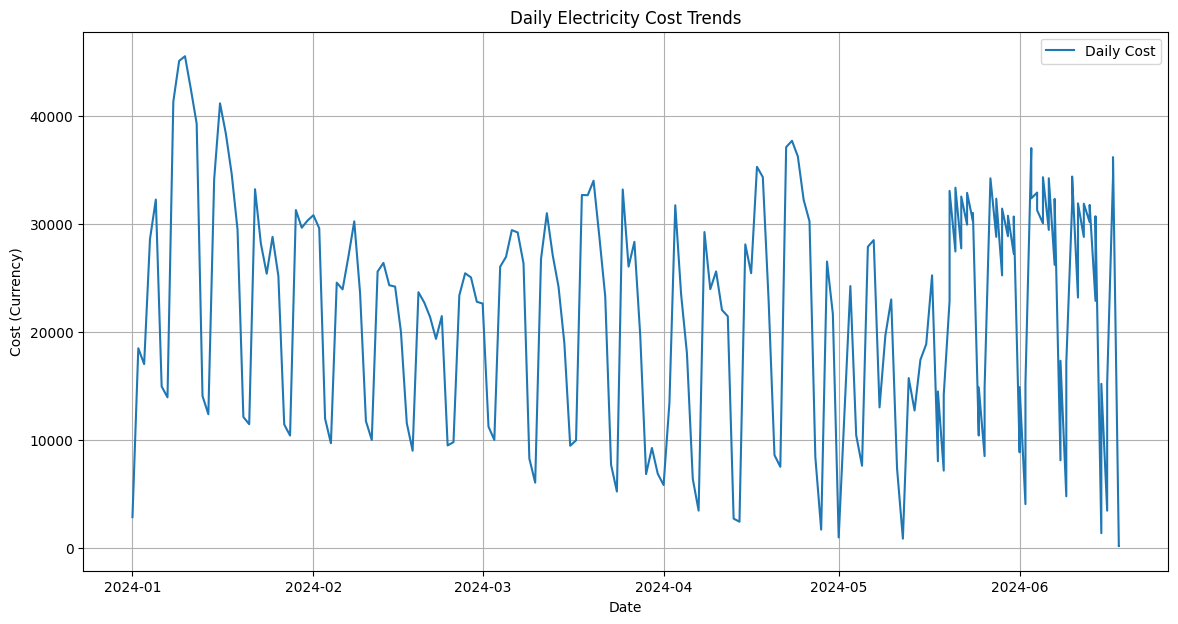

In [12]:
# Visualize the daily cost trends
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(merged_data_corrected.index, merged_data_corrected['Daily_Cost'], label='Daily Cost')
plt.xlabel('Date')
plt.ylabel('Cost (Currency)')
plt.title('Daily Electricity Cost Trends')
plt.legend()
plt.grid(True)
plt.show()




In [29]:
import plotly.graph_objects as go

# Create a line plot
fig = go.Figure()

# Add the daily cost data
fig.add_trace(go.Scatter(x=merged plot_corrected.index, y=merged_data_correctedly.graphCost'], mode='lines', name='Daily Cost'))

# Add the average spot prices data
fig.add_trace(go.Scatter(x=energy_data.index, y=, mode='lines', name='Average Spot Prices'))

# Set the layout
fig.update_layout(title='Daily Electricity Cost Trends', xaxis_title='Date', yaxis_title='Cost (Currency)')

# Display the plot
fig.show()
fig.write_html("daily_cost_trends.html")



In [28]:
# Round all results to two decimal places
merged_data_corrected = merged_data_corrected.round(2)

# Save the rounded dataframe to a new CSV file
rounded_output_file_path = 'Rounded_Corrected_Electricity_Consumption_and_Cost_Analysis.csv'
merged_data_corrected.to_csv(rounded_output_file_path)
import plotly.graph_objects as go

# Create a line plot
fig = go.Figure(data=go.Scatter(x=merged_data_corrected.index, y=merged_data_corrected['Daily_Cost'], mode='lines', name='Daily Cost'))

# Set the layout
fig.update_layout(title='Daily Electricity Cost Trends (Rounded)', xaxis_title='Date', yaxis_title='Cost (Currency)')

# Display the plot
fig.show()


Peak consumption periods

In [40]:
# Reset the index to work with interval times
consumption_data.reset_index(inplace=True)

# Extract the time part from the 'Interval_Start'
consumption_data['Time'] = consumption_data['Interval_Start'].dt.time

# Group by the time of day to calculate the average consumption for each 15-minute interval
average_consumption_by_time = consumption_data.groupby('Time')['Consumption_kWh'].mean()

# Sort the intervals by average consumption to identify peak periods
peak_consumption_periods = average_consumption_by_time.sort_values(ascending=False)

# Display the top 10 peak consumption periods
peak_consumption_periods.head(20)




ValueError: cannot insert level_0, already exists

Calculate the average spot price


In [30]:
# Calculate the average spot market cost based on historical data
average_spot_price = merged_data_corrected['Daily_Average_Price'].mean()
total_spot_cost = merged_data_corrected['Daily_Cost'].sum()
total_consumption_kWh = merged_data_corrected['Consumption_kWh'].sum()
average_spot_cost_per_kWh = total_spot_cost / total_consumption_kWh

# Assuming a hypothetical fixed rate for electricity (e.g., 1000 units of currency per MWh)
fixed_rate_per_kWh = 1000 / 1000  # converting to kWh price

# Calculate the total cost under the fixed rate contract
total_fixed_rate_cost = total_consumption_kWh * fixed_rate_per_kWh

# Display the comparison
comparison_data = {
    'Average Spot Market Cost per kWh': [average_spot_cost_per_kWh],
    'Fixed Rate Cost per kWh': [fixed_rate_per_kWh],
    'Total Cost on Spot Market': [total_spot_cost],
    'Total Cost on Fixed Rate': [total_fixed_rate_cost]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df


,Average Spot Market Cost per kWh,Fixed Rate Cost per kWh,Total Cost on Spot Market,Total Cost on Fixed Rate
0,2.388731,1.0,22889505.6,9582288.25


In [35]:
# Pre-bought rate per kWh
prebought_rate_per_kWh = 2350 / 1000  # converting to kWh price

# Calculate the daily cost under the pre-bought contract
merged_data_corrected['Prebought_Cost'] = merged_data_corrected['Consumption_kWh'] * prebought_rate_per_kWh

# Identify the days when it is cheaper to buy on the spot market
merged_data_corrected['Spot_Cheaper'] = merged_data_corrected['Daily_Cost'] < merged_data_corrected['Prebought_Cost']

# Calculate the total number of days and percentage of days when spot market is cheaper
total_days = merged_data_corrected.shape[0]
cheaper_spot_days = merged_data_corrected['Spot_Cheaper'].sum()
cheaper_spot_percentage = (cheaper_spot_days / total_days) * 100

# Display the results
result_summary = {
    'Total Days': total_days,
    'Days Spot Market Cheaper': cheaper_spot_days,
    'Percentage of Days Spot Market Cheaper': cheaper_spot_percentage
}

result_summary_df = pd.DataFrame([result_summary])
result_summary_df


,Total Days,Days Spot Market Cheaper,Percentage of Days Spot Market Cheaper
0,906,149,16.445916


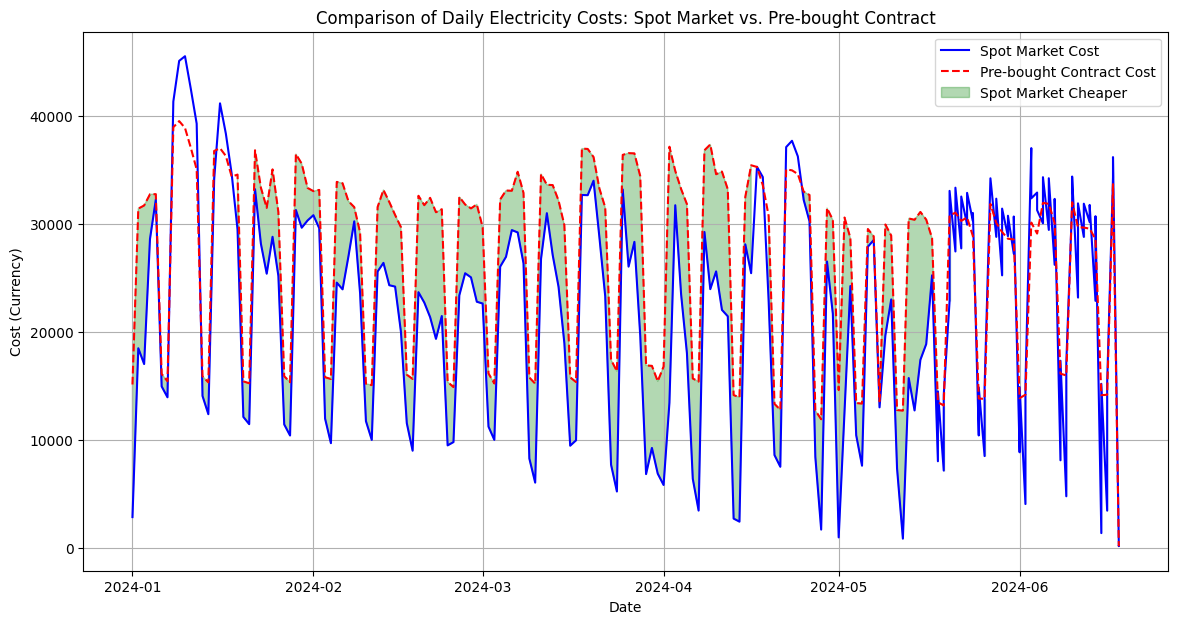

In [36]:
# Ensure all necessary columns are float types and there are no NaN values
merged_data_corrected['Daily_Cost'] = merged_data_corrected['Daily_Cost'].astype(float)
merged_data_corrected['Prebought_Cost'] = merged_data_corrected['Prebought_Cost'].astype(float)
merged_data_corrected['Spot_Cheaper'] = merged_data_corrected['Spot_Cheaper'].astype(bool)

# Handle any potential NaN values
merged_data_corrected = merged_data_corrected.dropna(subset=['Daily_Cost', 'Prebought_Cost'])

# Correct visualization of days with cheaper spot prices
plt.figure(figsize=(14, 7))
plt.plot(merged_data_corrected.index, merged_data_corrected['Daily_Cost'], label='Spot Market Cost', color='blue')
plt.plot(merged_data_corrected.index, merged_data_corrected['Prebought_Cost'], label='Pre-bought Contract Cost', linestyle='--', color='red')

# Highlight the areas where the spot market is cheaper
plt.fill_between(merged_data_corrected.index, merged_data_corrected['Daily_Cost'], merged_data_corrected['Prebought_Cost'], 
                 where=merged_data_corrected['Spot_Cheaper'], color='green', alpha=0.3, label='Spot Market Cheaper')

plt.xlabel('Date')
plt.ylabel('Cost (Currency)')
plt.title('Comparison of Daily Electricity Costs: Spot Market vs. Pre-bought Contract')
plt.legend()
plt.grid(True)
plt.show()


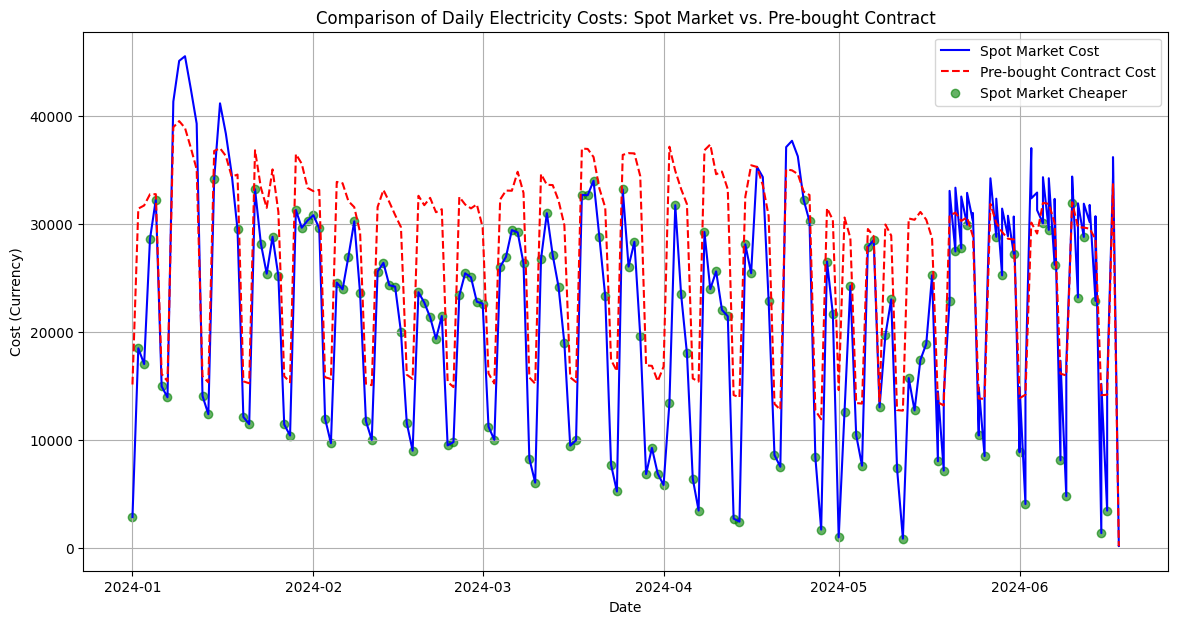